# Jupyter - guided tour of a software ecosystem

![](images/Jupiter_and_the_Galilean_Satellites.jpg)

## Plan

1. Notable usage contexts
2. Quick demo
3. How does it work under the hood?
4. Multi-users deployments

## 1. Some usage contexts

## Laboratoire de l'Accélérateur Linéaire

![](images/2013-LAL-2plaques.JPG)

Credit: Laboratoire de l'Accélérateur Linéaire, [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en)

## Netflix headquarters

![](images/1023px-Netflix_headquarters.jpg)

Credit : [Coolcaesar](https://en.wikipedia.org/wiki/User:Coolcaesar) at English Wikipedia, [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en)

## Bloomberg Tower

![](images/Bloomberg_tower.jpg)

Crédit : Markus Poessel (Mapos), [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en)

## Large Synoptic Survey Telescope (artist view)

![](images/Close_up_of_Telescope_in_the_Dome.jpg)

Credit : Todd Mason, Mason Productions Inc. / LSST Corporation, [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.en)

## Utilisations

- data analysis
- coding experiments
- teaching
- publishing

## Sources

- Laboratoire de l'Accélérateur Linéaire, CNRS, Polytechnique : [Deploying JupyterHub with Kubernetes on OpenStack](https://blog.jupyter.org/how-to-deploy-jupyterhub-with-kubernetes-on-openstack-f8f6120d4b1) 
- Netflix : [Beyond Interactive: Notebook Innovation at Netflix](https://medium.com/netflix-techblog/notebook-innovation-591ee3221233)
- Bloomberg : [Inside the Collaboration That Built the Open Source JupyterLab Project](https://www.techatbloomberg.com/blog/inside-the-collaboration-that-built-the-open-source-jupyterlab-project/)                                                                                       
- Large Synoptic Survey Telescope : [Why Jupyter is data scientists’ computational notebook of choice](https://www.nature.com/articles/d41586-018-07196-1)
- NASA : [Earth Data Analytics Service (EDAS)](https://www.nccs.nasa.gov/services/Analytics)

## 2. Quick demo!

Jupyter can be used with **Ju**lia, **Pyt**hon, **R** et a lot of other langages...

Here we use Python!

In [3]:
2 + 47

49

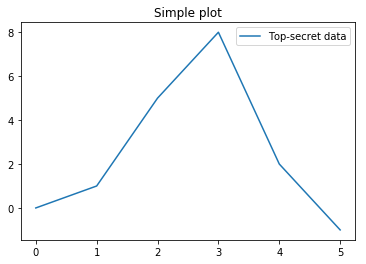

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.title("Simple plot")
plt.plot([0, 1, 5, 8, 2, -1], label="Top-secret data")
plt.legend();

### Visualizing meteorological data

Data released under an [open license](https://www.etalab.gouv.fr/wp-content/uploads/2014/05/Licence_Ouverte.pdf) downloaded [from Météo France website](https://donneespubliques.meteofrance.fr/?fond=produit&id_produit=90&id_rubrique=32).

In [2]:
!ls data/

postesSynop.csv  synop.201810.csv.gz


In [3]:
import pandas as pd

stations = pd.read_csv("data/postesSynop.csv", delimiter=";", index_col="ID")
stations.head()

Nom   Latitude  Longitude  Altitude
ID                                                   
7005        ABBEVILLE  50.136000   1.834000        69
7015    LILLE-LESQUIN  50.570000   3.097500        47
7020  PTE DE LA HAGUE  49.725167  -1.939833         6
7027   CAEN-CARPIQUET  49.180000  -0.456167        67
7037       ROUEN-BOOS  49.383000   1.181667       151

In [4]:
observations = pd.read_csv("data/synop.201810.csv.gz", na_values="mq",
                           delimiter=";", parse_dates=['date'],
                           index_col='date')
observations.head()

numer_sta      pmer   tend  cod_tend     dd    ff       t      td  \
date                                                                            
2018-10-01       7005  101930.0   30.0       0.0  340.0   3.9  282.75  276.25   
2018-10-01       7015  101800.0    0.0       4.0  280.0   3.8  283.75  280.45   
2018-10-01       7020  102390.0  120.0       1.0  340.0  11.4  286.75  279.65   
2018-10-01       7027  102190.0  100.0       1.0  320.0   6.4  286.45  279.55   
2018-10-01       7037  102000.0    0.0       5.0  340.0   3.3  284.45  281.35   

               u       vv  ...  nnuage2  ctype2  hnuage2  nnuage3  ctype3  \
date                       ...                                              
2018-10-01  64.0  20000.0  ...      NaN     NaN      NaN      NaN     NaN   
2018-10-01  80.0  37910.0  ...      8.0     NaN   2400.0      NaN     NaN   
2018-10-01  62.0  14000.0  ...      NaN     NaN      NaN      NaN     NaN   
2018-10-01  63.0  59820.0  ...      8.0     NaN   1860.0      NaN     NaN   
2018-10-01  81.0  57650.0  ...      6.0     NaN   1050.0      7.0     NaN   

            hnuage3  nnuage4  ctype4  hnuage4  Unnamed: 59  
date                                                        
2018-10-01      NaN      NaN     NaN      NaN          NaN  
2018-10-01      NaN      NaN     NaN      NaN          NaN  
2018-10-01      NaN      NaN     NaN      NaN          NaN  
2018-10-01      NaN      NaN     NaN      NaN          NaN  
2018-10-01   1290.0      NaN     NaN      NaN          NaN  

[5 rows x 59 columns]

In [5]:
df = observations.join(stations, on="numer_sta")
df = df[["Nom", "t", "Latitude", "Longitude"]]
df['celcius'] = df['t'] - 273.15
del df['t']
toulouse = df.loc[df.Nom=="TOULOUSE-BLAGNAC"]
toulouse.head()

Nom  Latitude  Longitude  celcius
date                                                               
2018-10-01 00:00:00  TOULOUSE-BLAGNAC    43.621   1.378833     13.6
2018-10-01 03:00:00  TOULOUSE-BLAGNAC    43.621   1.378833     11.8
2018-10-01 06:00:00  TOULOUSE-BLAGNAC    43.621   1.378833     11.4
2018-10-01 09:00:00  TOULOUSE-BLAGNAC    43.621   1.378833     13.7
2018-10-01 12:00:00  TOULOUSE-BLAGNAC    43.621   1.378833     16.4

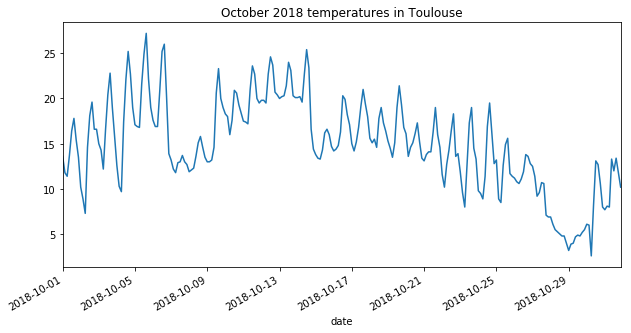

In [7]:
toulouse['celcius'].plot(figsize=(10, 5))
plt.title("October 2018 temperatures in Toulouse");

In [8]:
from ipywidgets import interact

def plot_station(name):
    station_df = df.loc[df.Nom==name]
    station_df['celcius'].plot(figsize=(10, 5))
    plt.title("Température pour %s" % name);
    
interact(plot_station, name=sorted(stations.Nom));

interactive(children=(Dropdown(description='name', options=('ABBEVILLE', 'AJACCIO', 'ALENCON', 'BALE-MULHOUSE'…

In [15]:
import ipywidgets as widgets

label = widgets.Label()
selector = widgets.Select(options=sorted(stations.Nom))

def callback_function(change):
    name = change["new"]
    station_df = df.loc[df.Nom==name]
    tmin, tmax = station_df.celcius.min(), station_df.celcius.max()
    label.value = f"{name} — min: {tmin:.2f}, max: {tmax:.2f}"
    
selector.observe(callback_function, "value")
title = widgets.HTML("<h2>Min/max temperature by station</h2>")
row = widgets.HBox([selector, label])
widgets.VBox([title, row])

In [16]:
from ipyleaflet import Map, Popup

m = Map(center=(43.6, 1.4), zoom=8, close_popup_on_click=False)

for index, row in df["2018-10-29 00:00:00"].iterrows():
    html = widgets.HTML(f"{row.Nom}<br>{row.celcius:.2f} °C")
    popup = Popup(location=(row.Latitude, row.Longitude),
                  child=html, close_button=False)
    m.add_layer(popup)
    
m

/home/al/.envs/eotraining/lib/python3.7/site-packages/distributed/utils.py:136: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  RuntimeWarning,


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

### Les widgets

- *standard* widgets: [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/)

- des [widgets tiers](http://jupyter.org/widgets)
  - [bqplot](https://github.com/bloomberg/bqplot)
  - [Plotly](https://plot.ly/ipython-notebooks/)
  - [Pyviz](http://www.pyviz.org/)

- possible to create our own widgets with JavaScript and the Backbone.js framework

### Magic command: performance measurement

In [22]:
%%timeit

s = ""
for _ in range(1_000_000):
    s += "x"
    
assert len(s) == 1_000_000

85.7 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%%timeit

s = "".join("x" for _ in range(1_000_000))

assert len(s) == 1_000_000

62 ms ± 781 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%timeit

s = "x" * 1_000_000

assert len(s) == 1_000_000

32.3 µs ± 347 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Magic command: calling another language

In [25]:
%%perl

my $a = "Hello", $b = "World";
print "$a $b!"

Hello World!

### IPython magic commands

- performance measurements
- profiling
- debugging
- external calls
- and much more, see `%magic`

### Writing math with $\LaTeX$

$e=mc^2$

## 3. How does it work under the hood?

**Jupyter Notebook architecture**

So what is Jupyter Notebook really?

- a web interface to executre code and visualize results

- a document format

- a communication protocol between the web interface and a *kernel* that executes code and sends results back

![](images/notebook_components.png)

Credit : [Documentation Jupyter](https://jupyter.readthedocs.io/en/latest/architecture/how_jupyter_ipython_work.html#notebooks)

### Kernels

* Julia
* Python
* R

et [many more...](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)

### What kernels do

- executre code
- autocomplete engine
- code instrumentation
- special commands

### IPython kernel

![](images/ipy_kernel_and_terminal.png)

## 4. Multi-users deployments

- JupyterHub
- BinderHub

### JupyterHub

- user authentication
- spawns separate Jupyter Notebook servers for each user

### JupyterHub Architecture

![](images/jhub-parts1.png)

Credit : [Documentation JupyterHub](https://jupyterhub.readthedocs.io/en/stable/reference/technical-overview.html#the-subsystems-hub-proxy-single-user-notebook-server)

### Extension points

- Authenticator : use your own users database, LDAP directory, etc.

- Spawner : customize how Jupyter Notebook servers get started

### Spawners

By default: **LocalProcessSpawner**

But also spawners based on **containers** :
- DockerSpawner
- KubeSpawner
- MarathonSpawner

## Pre-built docker images


![](images/docker-stacks.png)

### BinderHub

- build images on-the-fly based on specifications from a git repository

- starts Jupyter Notebook in a container created from this image

- based on JupyterHub and Kubernetes

### Déploiements publics

- public reference deployment: [Binder](https://mybinder.org/)

- [Pangeo](http://binder.pangeo.io/), a BinderHub deployment focused on earth science needs that allows parallel computing on a Kubernetes cluster thanks to the Dask library

### Going further...

- [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) : new IDE-style interface for notebooks
- [Jupyter Notebook extensions](https://jupyter-contrib-nbextensions.readthedocs.io/)
- critical presentation of notebooks raising interesting points : [I don't like notebooks](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/preview#slide=id.g362da58057_0_1)
- historical perspective on the notebook interface : [The Scientific Paper is Obsolete](https://www.theatlantic.com/science/archive/2018/04/the-scientific-paper-is-obsolete/556676/)